In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [4]:
df = load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
dataset = pd.DataFrame(df.data, columns=df.feature_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
dataset["Price"] = df.target

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [86]:
## Independent and dependent features
X = dataset.iloc[:,:-1] ##independent features
y = dataset.iloc[:,-1] ##dependent features

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()

In [18]:
from sklearn.model_selection import cross_val_score

In [21]:
mse = cross_val_score(regressor, X, y, scoring='neg_mean_squared_error', cv=5)

In [22]:
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [23]:
np.mean(mse)

-37.13180746769922

## Ridge Regression

In [64]:
from sklearn.linear_model import Ridge

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
ridge = Ridge()

In [67]:
paramenters={'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50,55,100]}

In [68]:
ridge_regressor = GridSearchCV(ridge, paramenters, scoring='neg_mean_squared_error', cv=5,verbose=1)
ridge_regressor.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40, 50,
                                   55, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [69]:
print(ridge_regressor.best_params_)

{'alpha': 100}


In [70]:
print(ridge_regressor.best_score_)

-29.905701947540372


## Lasso Regression

In [71]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

{'alpha': 1}
-35.531580220694856


## Elastic Net

In [72]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elasticnet=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
elasticnet_regressor=GridSearchCV(elasticnet,parameters,scoring='neg_mean_squared_error',cv=5)

elasticnet_regressor.fit(X,y)
print(elasticnet_regressor.best_params_)
print(elasticnet_regressor.best_score_)

C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.857e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.383e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\ashwin.prabhu\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

{'alpha': 1}
-32.05368976651791


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [74]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
prediction_elasticnet = elasticnet_regressor.predict(X_test)

In [75]:
import seaborn as sns

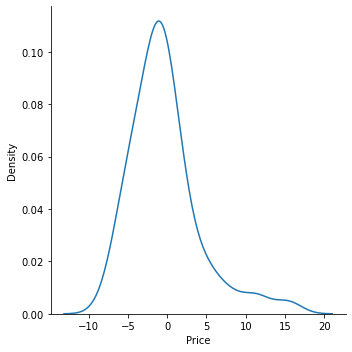

In [76]:
sns.displot(y_test-prediction_lasso, kind="kde")

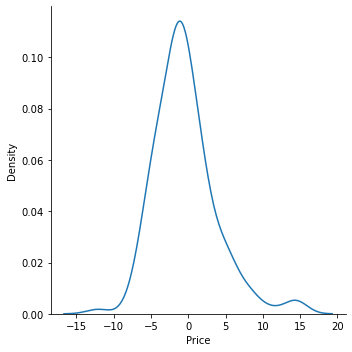

In [77]:
sns.displot(y_test-prediction_ridge, kind="kde")

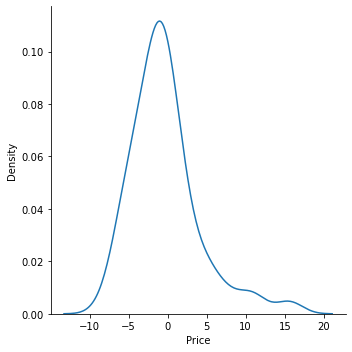

In [78]:
sns.displot(y_test-prediction_elasticnet, kind="kde")

In [82]:
# Performance metrics
from sklearn.metrics import r2_score

In [83]:
r2_score(y_test, prediction_lasso)

0.7694900078387538

In [84]:
r2_score(y_test, prediction_ridge)

0.7992652870486556

In [85]:
r2_score(y_test, prediction_elasticnet)

0.7705460063263532